In [102]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC , LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

## Importing Datasets 

In [103]:
test_data = pd.read_csv(r'F:\Machine Learning\Kaggle\Titanic\test.csv')
train_data = pd.read_csv(r'F:\Machine Learning\Kaggle\Titanic\train.csv')
combine = [test_data,train_data]

In [104]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [105]:
for col in train_data:
    print(col," ",sum(train_data[col].isnull()))

PassengerId   0
Survived   0
Pclass   0
Name   0
Sex   0
Age   177
SibSp   0
Parch   0
Ticket   0
Fare   0
Cabin   687
Embarked   2


In [106]:
for col in test_data:
    print(col," ",sum(test_data[col].isnull()))

PassengerId   0
Pclass   0
Name   0
Sex   0
Age   86
SibSp   0
Parch   0
Ticket   0
Fare   1
Cabin   327
Embarked   0


In [107]:
print(f'Training data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Training data shape: (891, 12)
Test data shape: (418, 11)


In [108]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
sum(train_data['PassengerId'].value_counts())

891

In [111]:
sum(train_data['Pclass'].value_counts())

891

In [112]:
train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [113]:
count_frequency = train_data['Pclass'].value_counts().to_dict()
print(count_frequency)

{3: 491, 1: 216, 2: 184}


In [114]:
labels = count_frequency.keys()
values = count_frequency.values()

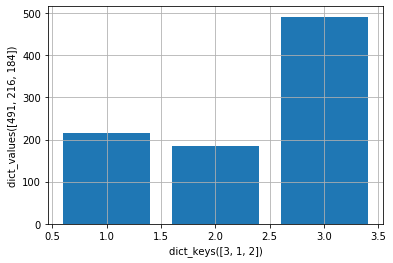

In [115]:
plt.bar(labels,values)

plt.grid()
plt.xlabel(labels)
plt.ylabel(values)
plt.show()

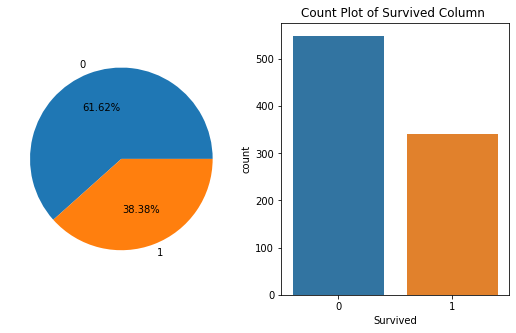

In [116]:
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.pie(train_data['Survived'].value_counts() , labels=train_data['Survived'].value_counts().index,autopct='%.2f%%')


plt.subplot(122)
ax = sns.countplot(data=train_data,x='Survived')
#ax.bar_label(ax.containers[0])
plt.title("Count Plot of Survived Column ")
plt.show()

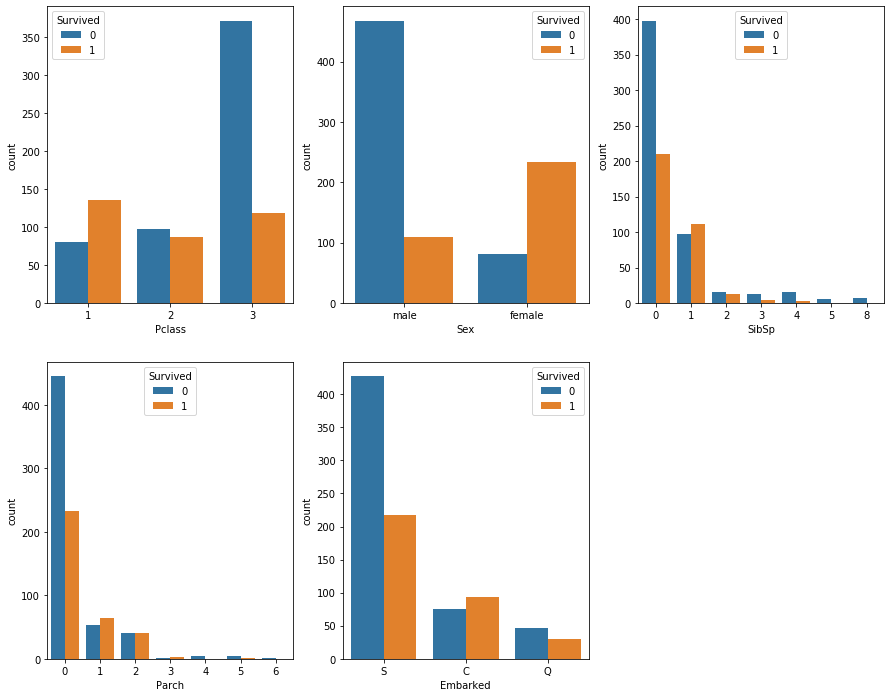

In [117]:
count_list = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']

plt.figure(figsize=(15,12))

for i,col in enumerate(count_list):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(data=train_data,x=col,hue='Survived')
    
plt.show()
    

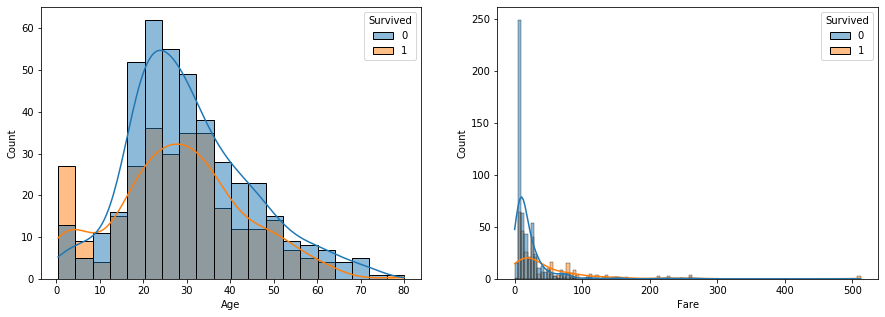

In [118]:
# Survived based on Age

plt.figure(figsize=(15,5))
plt.subplot(121)

sns.histplot(data=train_data , x='Age' , hue = 'Survived', kde= True)

plt.subplot(122)

sns.histplot(data=train_data,x='Fare' , hue = 'Survived',kde=True)
plt.show()

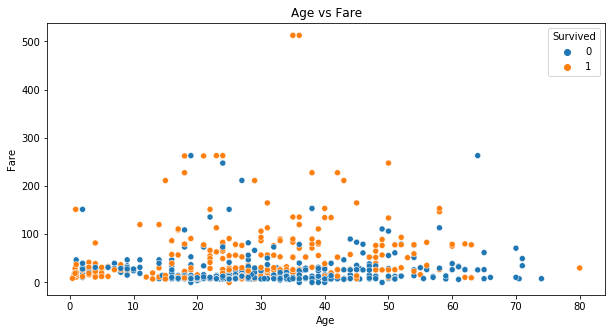

In [119]:
# Survival based on Age

plt.figure(figsize=(10,5))
sns.scatterplot(data=train_data,x='Age' , y='Fare' , hue = 'Survived')
plt.title("Age vs Fare")
plt.show()

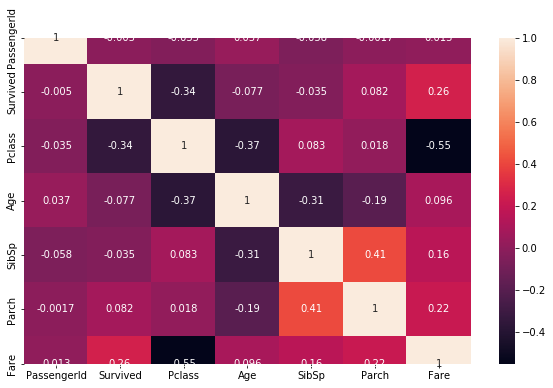

In [120]:
plt.figure(figsize=(10,6))

sns.heatmap(train_data.corr(),annot=True)

plt.show()

In [121]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()+1)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean()+1)

In [123]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked']=='S')
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked']=='S')

In [124]:
test_data['Fare'] = train_data['Fare'].fillna(train_data['Fare']==24)

In [125]:
for col in train_data:
    print(col," ",sum(train_data[col].isnull()))

PassengerId   0
Survived   0
Pclass   0
Name   0
Sex   0
Age   0
SibSp   0
Parch   0
Ticket   0
Fare   0
Cabin   687
Embarked   0


In [126]:
for col in test_data:
    print(col," ",sum(test_data[col].isnull()))

PassengerId   0
Pclass   0
Name   0
Sex   0
Age   0
SibSp   0
Parch   0
Ticket   0
Fare   0
Cabin   327
Embarked   0


# Data PreProcesssing

In [127]:
X_train = train_data.drop(['Survived','PassengerId','Name','Cabin','Ticket'],axis=1)
y_train = train_data['Survived']

X_test = test_data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [128]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,30.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [129]:
# # Encoding Sex and Embarked features
# sex_encode = {
#     'male':1,
#     'female':2
# }
# embarked_encode = {
#     'S':3,
#     'C':2,
#     'Q':1
# }
X_train['Sex'].replace(['male','female'],[1,2],inplace=True)
X_train['Embarked'].replace(['S','C','Q'],[3,2,1],inplace=True)

X_test['Sex'].replace(['male','female'],[1,2],inplace=True)
X_test['Embarked'].replace(['S','C','Q'],[3,2,1],inplace=True)


In [130]:
# encoder = OrdinalEncoder()
# encoder_train = pd.DataFrame(encoder.fit_transform(X_train[['Sex','Embarked']]),columns=['Sex','Embarked'])
# encoder_test = pd.DataFrame(encoder.transform(X_test[['Sex','Embarked']]),columns=['Sex','Embarked'])

# X_train = pd.concat([X_train.drop(['Sex','Embarked'],axis=1),encoder_train],axis=1)
# X_test = pd.concat([X_test.drop(['Sex','Embarked'],axis=1),encoder_test],axis=1)
# feature_columns = [col for col in X_train.columns]
# # Imputation of values
# imputer = SimpleImputer(missing_values=np.nan)
# X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=feature_columns)
# X_test = pd.DataFrame(imputer.fit_transform(X_test),columns=feature_columns)
# # Feature Scaling
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = feature_columns)
# X_test = pd.DataFrame(scaler.transform(X_test),columns = feature_columns)

In [131]:
#pd.get_dummies(X_train,drop_first=True)
#pd.get_dummies(X_test,drop_first=True)

In [132]:
pd.get_dummies(X_test,drop_first=True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.2500,1
1,3,2,47.00000,1,0,71.2833,3
2,2,1,62.00000,0,0,7.9250,1
3,3,1,27.00000,0,0,53.1000,3
4,3,2,22.00000,1,1,8.0500,3
...,...,...,...,...,...,...,...
413,3,1,31.27259,0,0,0.0000,3
414,1,2,39.00000,0,0,7.9250,2
415,3,1,38.50000,0,0,8.0500,3
416,3,1,31.27259,0,0,32.5000,3


In [133]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,3
1,1,2,38.000000,1,0,71.2833,2
2,3,2,26.000000,0,0,7.9250,3
3,1,2,35.000000,1,0,53.1000,3
4,3,1,35.000000,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,3
887,1,2,19.000000,0,0,30.0000,3
888,3,2,30.699118,1,2,23.4500,3
889,1,1,26.000000,0,0,30.0000,2


In [134]:
rfc = RandomForestClassifier(n_estimators = 100,max_depth=8,random_state=0)

In [135]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [142]:
y_pred_train = rfc.predict(X_train)

In [143]:
print('Classification Report on Train Data','\n\n',classification_report(y_train,y_pred_train))

Classification Report on Train Data 

               precision    recall  f1-score   support

           0       0.89      0.97      0.93       549
           1       0.94      0.82      0.87       342

    accuracy                           0.91       891
   macro avg       0.92      0.89      0.90       891
weighted avg       0.91      0.91      0.91       891



In [144]:

models = [DecisionTreeClassifier() , RandomForestClassifier() , KNeighborsClassifier() , SGDClassifier()]

for model in models:
    model_name = model
    model_name.fit(X_train, y_train)
    y_pred = model_name.predict(X_test)
    print(model_name," " , model_name.score(X_test,y_pred))
    print(f1_score(y_pred,model_name.predict(X_test),average=None))

DecisionTreeClassifier()   1.0
[1. 1.]
RandomForestClassifier()   1.0
[1. 1.]
KNeighborsClassifier()   1.0
[1. 1.]
SGDClassifier()   1.0
[1. 1.]


In [139]:
Kn = KNeighborsClassifier()
Kn.fit(X_train,y_train)
y_pred = Kn.predict(X_test)
print(Kn.score(X_test,y_pred))

1.0


In [140]:
output = pd.DataFrame({'PassengerId':test_data.PassengerId , 'Survived':y_pred})

In [141]:
output.to_csv('my_submission.csv',index=False)
print('Your Submission was successfully saved!')

Your Submission was successfully saved!
